# Accuracy test for ndarray-odeint

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## generate data for accuracy test

In [3]:
! cargo test

    Finished debug [unoptimized + debuginfo] target(s) in 0.0 secs
     Running target/debug/accuracy-0e48411c4aa4fd8f

running 2 tests
test euler ... ok
test rk4 ... ok

test result: ok. 2 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/main-96134d66919c69ee

running 0 tests

test result: ok. 0 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/deps/ndarray_odeint-1fd63c5a70bda2f6

running 0 tests

test result: ok. 0 passed; 0 failed; 0 ignored; 0 measured

   Doc-tests ndarray-odeint

running 0 tests

test result: ok. 0 passed; 0 failed; 0 ignored; 0 measured



## analysis

In [4]:
euler = pd.read_csv("euler.csv").dropna().set_index("dt")
rk4 = pd.read_csv("rk4.csv").dropna().set_index("dt")

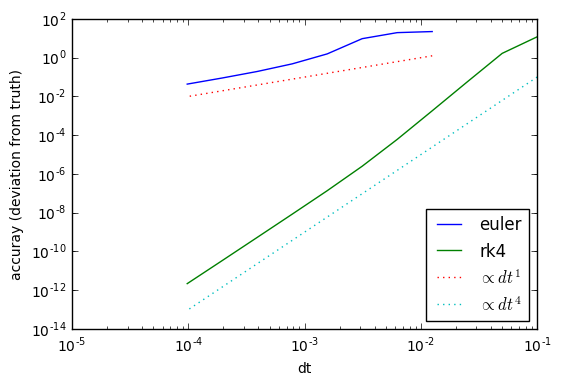

In [5]:
plt.plot(euler, label="euler")
plt.plot(rk4, label="rk4")
plt.plot(euler.index, 100*euler.index, ":", label=r"$\propto dt^1$")
plt.plot(rk4.index, 1000*rk4.index**4, ":", label=r"$\propto dt^4$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("accuray (deviation from truth)")
plt.legend(loc=4)